In [1]:
from spacerocks import SpaceRock, Units

import numpy as np
from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name = 'Ceres'

In [3]:
rock = SpaceRock.from_horizons(name=name)

In [4]:
startdate = Time('2000-01-01', scale='utc', format='iso')
enddate   = Time('2050-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, enddate.jd, 30), scale='utc', format='jd')

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [5]:
units = Units()
units.timescale = 'utc'
prop, planets, sim = rock.propagate(epochs=testdates.jd, model='PLANETS', units=units, gr=True)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

In [6]:
obs = prop.observe(obscode='W84')

In [7]:
rock_id = name
ephem_Horizons = Horizons(id=rock_id, location='W84',
                          epochs={'start':testdates[0].iso, 
                                  'stop':testdates[-1].iso, 
                                  'step':'30d'}).ephemerides()

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [9]:
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(obs.ra.deg, obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)

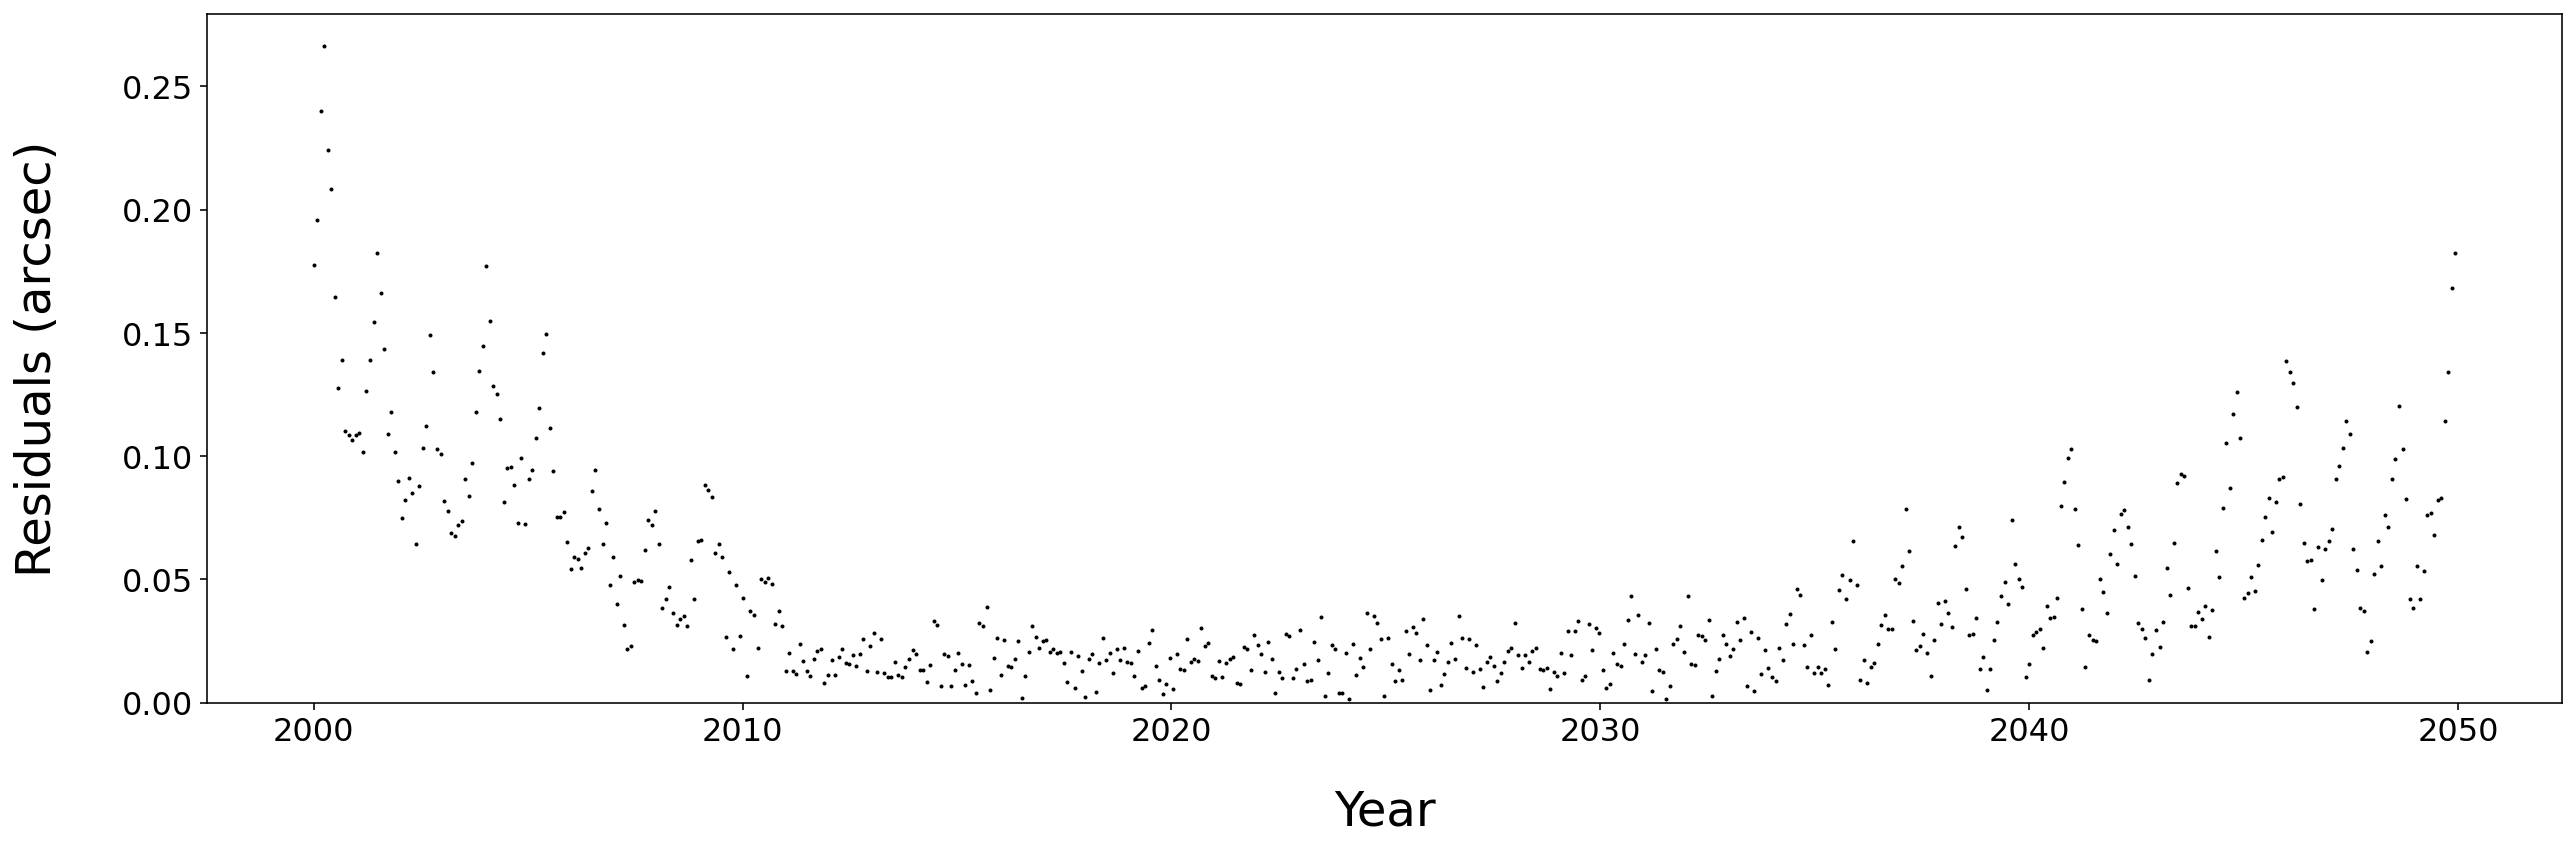

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.scatter(prop.epoch.decimalyear, sep.arcsec, color='black', s=1)

ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=24, labelpad=20)
ax.set_ylabel('Residuals (arcsec)', fontsize=24, labelpad=30)
ax.set_ylim(bottom=0)
fig.tight_layout()

In [14]:
prop.H